In [2]:

import pandas as pd 
import numpy as np
import seaborn as sns 
from scipy import stats
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
sales = pd.read_csv('D:/oasis/sales_price_prediction/Advertising.csv',index_col=0)

sales.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
sales.shape

(200, 4)

In [5]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


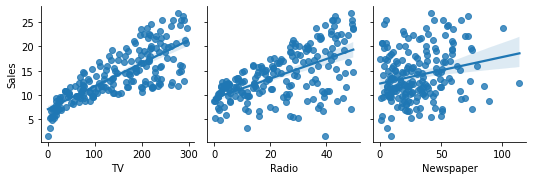

In [6]:
sns.pairplot(sales,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='reg')

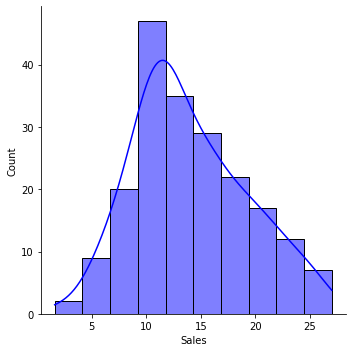

In [7]:
sns.displot(sales.Sales,bins=10,color='blue',kde=True)

<AxesSubplot:>

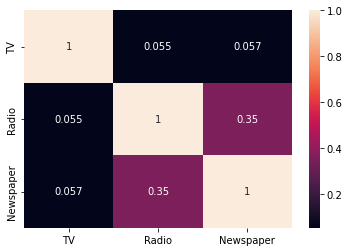

In [8]:
sns.heatmap(sales.drop('Sales',axis=1).corr(),annot=True)

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
r = sales[["TV", "Radio","Newspaper"]].values
vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(r, i) for i in range(3)]
vif_df["feature"] = ["TV", "Radio","Newspaper"]
vif_df

,VIF,feature
0,2.486772,TV
1,3.285462,Radio
2,3.055245,Newspaper


In [10]:
X = sales.drop(['Sales','Newspaper'], axis=1)
y = sales[["Sales"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)


models = [('LinearRegression', LinearRegression())]

In [11]:
lin_model = ols(formula="Sales ~ TV + Radio ",data=sales).fit()

print(lin_model.params,"\n")
print(lin_model.summary())

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64 

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           4.83e-98
Time:                        15:05:46   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

In [12]:
X = sales.drop(['Sales'], axis=1)
y = sales[["Sales"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)


models = [('LinearRegression', LinearRegression())]

In [13]:
lin_model = ols(formula="Sales ~ TV + Radio + Newspaper ",data=sales).fit()

print(lin_model.params,"\n")
print(lin_model.summary())

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64 

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           1.58e-96
Time:                        15:05:46   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

adding the news paper or remove it not affect the model too much 